# Определение перспективного тарифа для телеком компании

Заказчик — коммерческий департамент телеком-компании "Мегалайн".Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческому департаменту необходимо понимание, какой тариф приносит больше денег.
Нужно сделать предварительный анализ тарифов на небольшой выборке клиентов (500 пользователей с данными, кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год). Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Изучение данных из файлов

In [1]:
import pandas as pd
import numpy as np

In [2]:
try:
    url_calls = 'https://drive.google.com/file/d/1gSgcJd7Mm5pUqSKg4xVe2-uu0l0IGSwb/view?usp=sharing'
    path_call = 'https://drive.google.com/uc?export=download&id='+url_calls.split('/')[-2]
    calls_df = pd.read_csv(path_call)
except:
    raise

In [3]:
try:
    url_inet = 'https://drive.google.com/file/d/1l6m0q8fSeu-4_UmMn8cJYuAheNCfC9Lw/view?usp=sharing'
    path_inet = 'https://drive.google.com/uc?export=download&id='+url_inet.split('/')[-2]
    inet_df = pd.read_csv(path_inet)
except:
    raise

In [4]:
try:
    url_msg = 'https://drive.google.com/file/d/1UHWz_Sj0E4QmmFpXqEIDmJaoqznUZw9l/view?usp=sharing'
    path_msg = 'https://drive.google.com/uc?export=download&id='+url_msg.split('/')[-2]
    msg_df =pd.read_csv(path_msg)
except:
    raise

In [5]:
try:
    url_trffs = 'https://drive.google.com/file/d/1R-yxONW9TCIrLUK0C-dbhaMlXHU_pjwX/view?usp=sharing'
    path_trffs = 'https://drive.google.com/uc?export=download&id='+url_trffs.split('/')[-2]
    trffs_df = pd.read_csv(path_trffs)
except:
    raise

In [6]:
try:
    url_users = 'https://drive.google.com/file/d/1tJxczJ_h7wQYLBIlNSJ28KqYQLMGyxiu/view?usp=sharing'
    path_users = 'https://drive.google.com/uc?export=download&id='+url_users.split('/')[-2]
    users_df = pd.read_csv(path_users)
except:
    raise

Импортируем библиотеки, прочтем все датасеты и запишем их в соответствующие датафреймы.

In [7]:
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [8]:
calls_df.head(3)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000


Изучим датафрейм с информацией о звонках. Поле с ID звонка имеет тип object, т.к. там используется нижнее подчеркивание, нет необходимости приводить его к типу int или другому типу. Скорее всего это поле является составным и формируется из user_id и порядкового номера звонка.
Поле call_date необходимо привести к формату даты-времени.
Поле duration имеет тип float, исходя из условия его нужно округлить в большую сторону, т.к. тарифицируется целое количество минут.
Поле user_id имеет тип int, скорее всего нет необходимости менять его тип.

In [9]:
len(calls_df[calls_df['id'].isna()])

0

Поле id не содержит пропусков.

In [10]:
len(calls_df[calls_df['call_date'].isna()])

0

Поле call_date не содержит пропусков.

In [11]:
len(calls_df[calls_df['duration'].isna()])

0

In [12]:
len(calls_df[calls_df['user_id'].isna()])

0

Поля duration и user_id не содержат пропусков.

In [13]:
inet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [14]:
inet_df.head(3)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000


Датасет inet_df имеет схожую структуру, проверим его на значения NaN

In [15]:
len(inet_df[inet_df['id'].isna()])
len(inet_df[inet_df['mb_used'].isna()])
len(inet_df[inet_df['session_date'].isna()])
len(inet_df[inet_df['user_id'].isna()])

0

Пропусков нет, требуется замена типа поля session_date.

In [16]:
msg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [17]:
len(msg_df[msg_df['id'].isna()])
len(msg_df[msg_df['message_date'].isna()])
len(msg_df[msg_df['user_id'].isna()])

0

Требуется замена типа поля message_date.

In [18]:
trffs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [19]:
trffs_df

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [20]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [21]:
len(users_df[users_df['churn_date'].isna()])

462

In [22]:
len(users_df[users_df['user_id'].isna()])
len(users_df[users_df['age'].isna()])
len(users_df[users_df['city'].isna()])
len(users_df[users_df['first_name'].isna()])
len(users_df[users_df['last_name'].isna()])
len(users_df[users_df['reg_date'].isna()])
len(users_df[users_df['tariff'].isna()])

0

Требуется замена типа поля reg_date.

## Предобработка данных

In [23]:
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], format = '%Y-%m-%d')

In [24]:
inet_df['session_date'] = pd.to_datetime(inet_df['session_date'], format = '%Y-%m-%d')

In [25]:
msg_df['message_date'] = pd.to_datetime(msg_df['message_date'], format = '%Y-%m-%d')

In [26]:
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'], format = '%Y-%m-%d')

In [27]:
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'], format = '%Y-%m-%d')

Изменим тип данных object на datetime во всех датафреймах.

In [28]:
calls_df['month'] = calls_df['call_date'].dt.month

In [29]:
inet_df['month'] = inet_df['session_date'].dt.month

In [30]:
msg_df['month'] = msg_df['message_date'].dt.month

Добавим столбцы с месяцами в таблицы со звонками, сообщениями и интеренет-трафиком.

In [31]:
calls_df['year'] = calls_df['call_date'].dt.year
calls_df['year'].value_counts()

2018    202607
Name: year, dtype: int64

In [32]:

calls_df['duration'] = calls_df['duration'].apply(np.ceil).astype(int)
inet_df['mb_used'] = inet_df['mb_used'].apply(np.ceil).astype(int)

Округлим минуты разговоров и мегабайты трафика вверх до целочисленных значений.

In [33]:
calls_expl = calls_df.pivot_table(index = ['user_id','month'], values = 'duration', aggfunc = ['count','sum']).reset_index().reset_index()
new_name = ['index',  'user_id', 'month', 'calls_qty', 'calls_minutes']
calls_expl.set_axis(new_name, axis = 'columns', inplace = True)
calls_expl.head()

,index,user_id,month,calls_qty,calls_minutes
0,0,1000,5,22,159
1,1,1000,6,43,172
2,2,1000,7,47,340
3,3,1000,8,52,408
4,4,1000,9,58,466


In [34]:
calls_expl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   index          3174 non-null   int64
 1   user_id        3174 non-null   int64
 2   month          3174 non-null   int64
 3   calls_qty      3174 non-null   int64
 4   calls_minutes  3174 non-null   int32
dtypes: int32(1), int64(4)
memory usage: 111.7 KB


Сформируем сводную с количеством сделанных звонков и израсходованных минут помесячно.

In [35]:
msg_qty = msg_df.pivot_table(index = ['user_id','month'], values = 'message_date', aggfunc = 'count').reset_index()
msg_qty.head(3)

,user_id,month,message_date
0,1000,5,22
1,1000,6,60
2,1000,7,75


Сформируем сводную с количеством отправленных сообщений в разрезе абонентов помесячно.

In [36]:
gb = inet_df.pivot_table(index = ['user_id','month'], values = 'mb_used', aggfunc = 'sum').reset_index()
gb.head(3)

,user_id,month,mb_used
0,1000,5,2256
1,1000,6,23257
2,1000,7,14016


In [37]:
gb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   user_id  3203 non-null   int64
 1   month    3203 non-null   int64
 2   mb_used  3203 non-null   int32
dtypes: int32(1), int64(2)
memory usage: 62.7 KB


Сформируем сводную с объемами трафика в разрезе абонентов помесячно.

In [38]:
map_lst = users_df.merge(trffs_df, how = 'left', left_on = 'tariff', right_on = 'tariff_name')
map_lst.head(3)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,50,15360,500,550,200,3,3,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,50,15360,500,550,200,3,3,smart


Объединим в один справочник датафрейм с данными абонентов и параметры их тарифов по значению поля "тариф" для того, чтобы посчитать помесячную выручку каждого пользователя.

In [39]:
calls_expl = calls_expl.append(msg_qty, sort = False)
total_trf = calls_expl.append(gb, sort = False)
total_trf.head(3)

,index,user_id,month,calls_qty,calls_minutes,message_date,mb_used
0,0.0,1000,5,22.0,159.0,NaN,NaN
1,1.0,1000,6,43.0,172.0,NaN,NaN
2,2.0,1000,7,47.0,340.0,NaN,NaN


Объединим в единый датафрейм данные о звонках, сообщениях и интернет-трафике пользоователей в разрезе месяцев.

In [40]:
total_trf['calls_minutes']=total_trf['calls_minutes'].fillna(0)
total_trf['message_date']=total_trf['message_date'].fillna(0)
total_trf['mb_used']=total_trf['mb_used'].fillna(0)
total_trf['calls_qty']=total_trf['calls_qty'].fillna(0)
total_trf.head(3)

,index,user_id,month,calls_qty,calls_minutes,message_date,mb_used
0,0.0,1000,5,22.0,159.0,0.0,0.0
1,1.0,1000,6,43.0,172.0,0.0,0.0
2,2.0,1000,7,47.0,340.0,0.0,0.0


Заменим NaN на нули.

In [41]:
total_trf['calls_minutes'].sum()
total_trf['message_date'].sum()
total_trf['mb_used'].sum()

55369459.0

In [42]:
calls_expl['calls_minutes'].sum()
msg_qty['message_date'].sum()
gb['mb_used'].sum()

55369459

Проверим, нет ли задвоений и не потерялись ли данные после объединения таблиц в общий датафрейм. Сумма минут, сообщений и мегабайт в общем датафрейме и в отдельных таблицах идентична.

In [43]:
total_trf = total_trf.merge(map_lst, how = 'left', left_on = 'user_id', right_on = 'user_id')
total_trf.head(3)

,index,user_id,month,calls_qty,calls_minutes,message_date,mb_used,age,churn_date,city,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,0.0,1000,5,22.0,159.0,0.0,0.0,52,NaT,Краснодар,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1.0,1000,6,43.0,172.0,0.0,0.0,52,NaT,Краснодар,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
2,2.0,1000,7,47.0,340.0,0.0,0.0,52,NaT,Краснодар,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra


Объединим все данные в итоговой таблице, чтобы посчитать выручку по каждому абоненту.

In [44]:
total_trf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9094 entries, 0 to 9093
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   index                  3174 non-null   float64       
 1   user_id                9094 non-null   int64         
 2   month                  9094 non-null   int64         
 3   calls_qty              9094 non-null   float64       
 4   calls_minutes          9094 non-null   float64       
 5   message_date           9094 non-null   float64       
 6   mb_used                9094 non-null   float64       
 7   age                    9094 non-null   int64         
 8   churn_date             513 non-null    datetime64[ns]
 9   city                   9094 non-null   object        
 10  first_name             9094 non-null   object        
 11  last_name              9094 non-null   object        
 12  reg_date               9094 non-null   datetime64[ns]
 13  tar

In [45]:
import math

In [46]:
def revenue_tot(row):
    length = row['calls_minutes']
    mess = row['message_date']
    mb = row['mb_used']
    length_limit = row['minutes_included']
    rub_monthly_fees = row['rub_monthly_fee']
    mess_limit = row['messages_included']
    mb_limit = row['mb_per_month_included']
    rub_per_gb = row['rub_per_gb']
    rub_per_message = row['rub_per_message']
    rub_per_minute = row['rub_per_minute']
    
    if length!=0:
        if (length - length_limit)>0:
            return (length-length_limit)*rub_per_minute + rub_monthly_fees
        else:
            return rub_monthly_fees
    elif mess!=0:
        if (mess-mess_limit)>0:
            return(mess-mess_limit)*rub_per_message
        else:
            return 0
    elif mb!=0:
        if (mb-mb_limit)>0:
            return math.ceil((mb-mb_limit)/1024) * rub_per_gb
        else:
            return 0
    else:
        return 0
total_trf['revenue'] = total_trf.apply(revenue_tot, axis = 1)    

In [47]:
total_trf.query('revenue!=0').head(3)

,index,user_id,month,calls_qty,calls_minutes,message_date,mb_used,age,churn_date,city,...,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,revenue
0,0.0,1000,5,22.0,159.0,0.0,0.0,52,NaT,Краснодар,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
1,1.0,1000,6,43.0,172.0,0.0,0.0,52,NaT,Краснодар,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
2,2.0,1000,7,47.0,340.0,0.0,0.0,52,NaT,Краснодар,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0


Посчитаем итоговую выручку по всем услугам.

In [48]:
total_trf.query('calls_minutes!=0 or message_date!=0 or mb_used!=0').pivot_table(index = 'tariff', values = 'revenue', aggfunc = 'sum')

,revenue
tariff,
smart,2881351.0
ultra,1965900.0


In [49]:
total_trf.groupby('tariff').sum()

,index,user_id,month,calls_qty,calls_minutes,message_date,mb_used,age,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
tariff,,,,,,,,,,,,,,,,
smart,3448906.0,7946686,53141,130315.0,931577.0,74413.0,36174861.0,297379,318650,97889280,3186500,3505150,1274600,19119,19119,2881351.0
ultra,1586645.0,3445525,22566,72292.0,518724.0,48623.0,19194598.0,126706,2721000,83589120,8163000,5305950,408150,2721,2721,1965900.0


In [50]:
total_trf.pivot_table(index = ['user_id', 'month'], values = 'revenue', aggfunc = 'sum').reset_index().sort_values(by = 'revenue',ascending = True).query('revenue!=0')

,user_id,month,revenue
1479,1231,10,150.0
1481,1231,12,300.0
1477,1231,8,300.0
3150,1489,9,400.0
3153,1489,12,400.0
...,...,...,...
1818,1286,12,5321.0
1647,1261,12,5672.0
3140,1486,11,5680.0
260,1042,12,5709.0


In [51]:
total_trf.query('user_id==1231')

,index,user_id,month,calls_qty,calls_minutes,message_date,mb_used,age,churn_date,city,...,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,revenue
4369,NaN,1231,5,0.0,0.0,55.0,0.0,63,NaT,Чебоксары,...,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0
4370,NaN,1231,6,0.0,0.0,201.0,0.0,63,NaT,Чебоксары,...,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0
4371,NaN,1231,7,0.0,0.0,211.0,0.0,63,NaT,Чебоксары,...,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0
4372,NaN,1231,8,0.0,0.0,180.0,0.0,63,NaT,Чебоксары,...,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0
4373,NaN,1231,9,0.0,0.0,188.0,0.0,63,NaT,Чебоксары,...,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0
4374,NaN,1231,10,0.0,0.0,185.0,0.0,63,NaT,Чебоксары,...,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0
4375,NaN,1231,11,0.0,0.0,173.0,0.0,63,NaT,Чебоксары,...,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0
4376,NaN,1231,12,0.0,0.0,191.0,0.0,63,NaT,Чебоксары,...,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0
7365,NaN,1231,5,0.0,0.0,0.0,10868.0,63,NaT,Чебоксары,...,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0
7366,NaN,1231,6,0.0,0.0,0.0,27850.0,63,NaT,Чебоксары,...,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0


## Анализ данных

In [52]:
total_trf.query('calls_minutes!=0 and tariff=="smart"')['calls_minutes'].describe()

count    2221.000000
mean      419.440342
std       188.992403
min         2.000000
25%       285.000000
50%       423.000000
75%       546.000000
max      1435.000000
Name: calls_minutes, dtype: float64

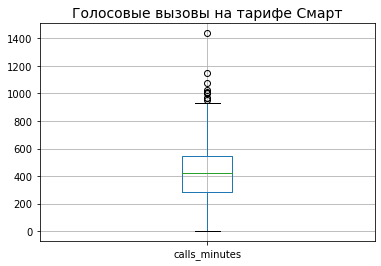

In [53]:
import matplotlib.pyplot as plt
total_trf.query('calls_minutes!=0 and tariff=="smart"').boxplot(column = 'calls_minutes');
plt.title('Голосовые вызовы на тарифе Смарт', fontsize = 14);

Изучим распределение месячных ненулевых объемов минут у абонентов тарифа "Смарт". 2 квартиль - от 285 до 423 минуты в месяц, медиана 423 минуты. Нормальные значения - до 1000 минут в месяц, выше уже идут редкие значения. Можно сделать вывод о том, что в среднем пользователям требуется от 285 до 423 минуты в месяц. Выше 1400 минут - значение, похожее на вброс. Среднее значение - 419 минут, очень близко к медиане, следовательно аномально больших значений не так много.

In [54]:
import numpy as np
smart_variance_calls_smart = np.var(total_trf.query('calls_minutes!=0 and tariff=="smart"')['calls_minutes'], ddof=1)
smart_variance_calls_smart

35718.128533936935

Диcперсия равна 35 718 минут в квадрате.

In [55]:
standard_deviation_calls_smart = np.std(total_trf.query('calls_minutes!=0 and tariff=="smart"')['calls_minutes'], ddof=1)
standard_deviation_calls_smart

188.9924033762652

Стандартное отклонение тарифа Смарт составляет 189 минут.

In [56]:
threestd_calls_smart = standard_deviation_calls_smart*3 + 419
threestd_calls_smart

985.9772101287956

Правило трех сигм дает нам 986 минут. Чтобы удостовериться, что 99% значений попадают в диапазон от 1 до 986, построим гистограмму и посмотрим, похоже ли распределение на нормальное.

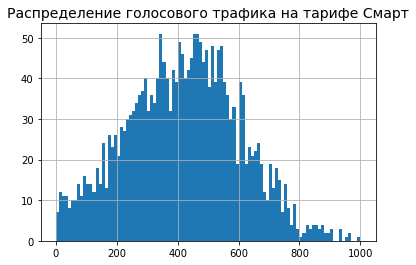

In [57]:
total_trf.query('calls_minutes!=0 and tariff=="smart"')['calls_minutes'].hist(bins = 100, range = (0,1000))
plt.title('Распределение голосового трафика на тарифе Смарт', fontsize = 14);

Распределение похоже на нормальное, датасет скошен влево. Из графика видно, что месячный расход голосового трафика для тарифа "Смарт" основной частью находится в зоне меньше 600 минут. Но до 800 гистограмма непрерывна, а после 900 идут аномалии. Для проверки гипотез в выборку предлагается включить данные с голосовым трафиком от 1 до 900 минут.

In [58]:
total_trf.query('calls_minutes!=0 and tariff=="ultra"')['calls_minutes'].describe()

count     947.000000
mean      547.755016
std       305.513385
min         1.000000
25%       311.000000
50%       529.000000
75%       758.000000
max      1673.000000
Name: calls_minutes, dtype: float64

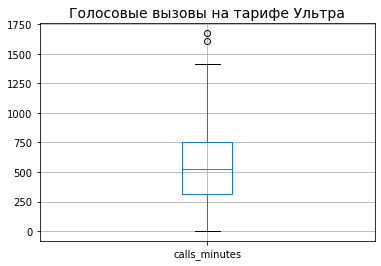

In [59]:
total_trf.query('calls_minutes!=0 and tariff=="ultra"').boxplot(column = 'calls_minutes');
plt.title('Голосовые вызовы на тарифе Ультра', fontsize = 14);

In [60]:
smart_variance = np.var(total_trf.query('calls_minutes!=0 and tariff=="ultra"')['calls_minutes'], ddof=1)
smart_variance

93338.4282914109

In [61]:
standard_deviation = np.std(total_trf.query('calls_minutes!=0 and tariff=="ultra"')['calls_minutes'], ddof=1)
standard_deviation

305.513384799113

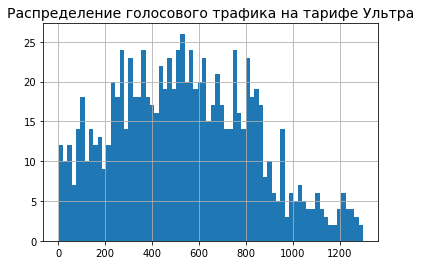

In [62]:
total_trf.query('calls_minutes!=0 and tariff=="ultra"')['calls_minutes'].hist(bins = 70, range = (1,1300))
plt.title('Распределение голосового трафика на тарифе Ультра', fontsize = 14);

Количественно абонентов на тарифе "Ультра" с ненулевым голосовым трафиком в выборке меньше почти в 2 раза (947 против 2221 на "Смарте"). Медианное и среднее значения находятся рядом - 547 и 529 минут, что говорит об отсутствии множества искажающих вбросов. Абоненты более дорогого тарифа "Ультра" меньше обращают внимание на длительность разговоров, т.к. бесплатных минут включено 3000 против 500 минут на "Смарте". Распределение на гистограмме намного меньше похоже на нормальное, чем у тарифа "Смарт". Визуально по количеству минут абоненты делятся на 3 группы: использующие от 1 до 200 минут в месяц, затем от 210 до 630 минут и от 630 до 900. До 1000 идут редкие значения.

In [63]:
total_trf.query('message_date!=0 and tariff=="smart"')['message_date'].describe()

count    1922.000000
mean       38.716441
std        26.787949
min         1.000000
25%        17.000000
50%        34.000000
75%        55.000000
max       143.000000
Name: message_date, dtype: float64

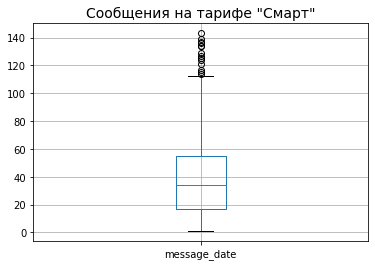

In [64]:
total_trf.query('message_date!=0 and tariff=="smart"').boxplot(column = 'message_date');
plt.title('Сообщения на тарифе "Смарт"', fontsize = 14);

In [65]:
smart_variance_msg_smart = np.var(total_trf.query('message_date!=0 and tariff=="smart"')['message_date'], ddof=1)
smart_variance_msg_smart

717.5942011753527

In [66]:
standard_deviation_msg_smart = np.std(total_trf.query('message_date!=0 and tariff=="smart"')['message_date'], ddof=1)
standard_deviation_msg_smart

26.787948804926305

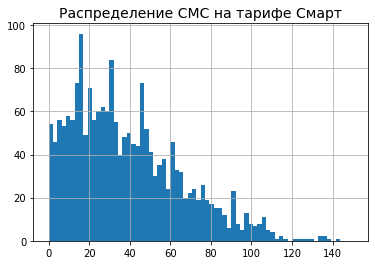

In [67]:
total_trf.query('message_date!=0 and tariff=="smart"')['message_date'].hist(bins = 70, range = (0,150))
plt.title('Распределение СМС на тарифе Смарт', fontsize = 14);

Описание показывает, что в среднем пользователь тарифа "Смарт" отправляет 34-38 СМС (медиана и средняя). Стандартное отклонение - 26 сообщений. Второй квартиль находится в зоне от 17 до 34 сообщений в месяц. Гистограмма по форме напоминает распределение Пуассона, если не считать четырех больших пиков на диаграмме. Верхний ус боксплота - примерно до 110 сообщений в месяц, дальше начинаются редкие значения, которые можно не учитывать. В датасет для проверки гипотез о средней выручке предлагается включить срез со значениями до 110 сообщений.

In [68]:
total_trf.query('message_date!=0 and tariff=="ultra"')['message_date'].describe()

count    795.000000
mean      61.161006
std       45.931026
min        1.000000
25%       24.000000
50%       51.000000
75%       87.500000
max      224.000000
Name: message_date, dtype: float64

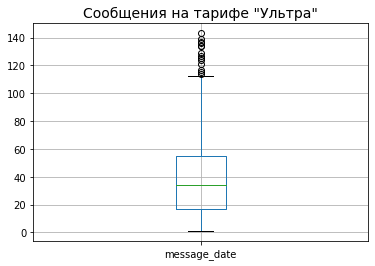

In [69]:
total_trf.query('message_date!=0 and tariff=="smart"').boxplot(column = 'message_date');
plt.title('Сообщения на тарифе "Ультра"', fontsize = 14);

In [70]:
smart_variance_msg_ultra = np.var(total_trf.query('message_date!=0 and tariff=="ultra"')['message_date'], ddof=1)
smart_variance_msg_ultra

2109.659182865204

In [71]:
standard_deviation_msg_ultra = np.std(total_trf.query('message_date!=0 and tariff=="ultra"')['message_date'], ddof=1)
standard_deviation_msg_ultra

45.931026364160466

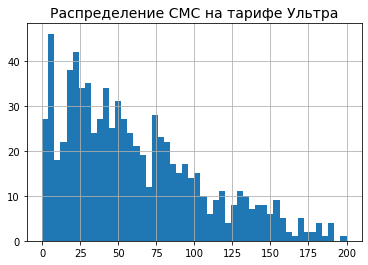

In [72]:
total_trf.query('message_date!=0 and tariff=="ultra"')['message_date'].hist(bins = 50, range = (0,200))
plt.title('Распределение СМС на тарифе Ультра', fontsize = 14);

Показатели использования абонентами сообщений на тарифе "Ультра" аналогичны показателям голосовых вызовов тарифа и имеют те же отличия от поведения абонентов тарифа "Смарт". Медиана - 51 сообщение в месяц, что превышает показатель 38 смс в месяц на тарифе Смарт. Среднее значение - 61, что говорит о наличии аномально высоких значений в датасете. Второй квартиль - от 24 до 51 сообщения в месяц. Верхний ус боксплота примерно заканчивается на значении 110. Но значения до 180 сообщений можно использовать в срезе для проверки гипотез. 

In [73]:
total_trf.query('mb_used!=0 and tariff=="smart"')['mb_used'].describe()

count     2227.000000
mean     16243.763359
std       5860.041941
min        202.000000
25%      12677.000000
50%      16533.000000
75%      20068.000000
max      38610.000000
Name: mb_used, dtype: float64

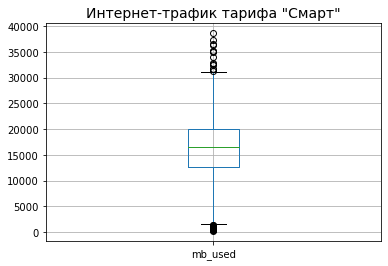

In [74]:
total_trf.query('mb_used!=0 and tariff=="smart"').boxplot(column = 'mb_used');
plt.title('Интернет-трафик тарифа "Смарт"', fontsize = 14);

In [75]:
smart_variance_gb_smart = np.var(total_trf.query('mb_used!=0 and tariff=="smart"')['mb_used'], ddof=1)
smart_variance_gb_smart

34340091.553589545

In [76]:
standard_deviation_gb_smart = np.std(total_trf.query('mb_used!=0 and tariff=="smart"')['mb_used'], ddof=1)
standard_deviation_gb_smart

5860.041941282464

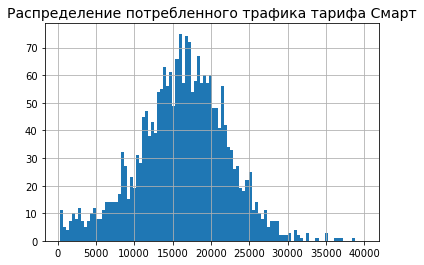

In [77]:
total_trf.query('mb_used!=0 and tariff=="smart"')['mb_used'].hist(bins = 100, range = (300,40000))
plt.title('Распределение потребленного трафика тарифа Смарт', fontsize = 14);

Трафик тарифа Смарт распределен достаточно равномерно, медианное значение - 16,5 ГБ в месяц, среднее - 16,2 ГБ. Второй квартиль - от 12,6 ГБ до 16,5 ГБ. Верхние аномалии начинаются от 30 ГБ, нижней границей можно считать 0,2 ГБ. Стандартное отклонение - 5,8 ГБ. Гистограмма очень напоминает нормальное распределение, но чуть скошена влево. Для анализа и проверки гипотез целесообразно брать срез от 200 МБ до 30 ГБ, остальные значения исключить из выборки, их плотность невысока.

In [78]:
total_trf.query('mb_used!=0 and tariff=="ultra"')['mb_used'].describe()

count      974.000000
mean     19706.979466
std       9937.127298
min        366.000000
25%      12073.750000
50%      19427.500000
75%      26936.250000
max      49789.000000
Name: mb_used, dtype: float64

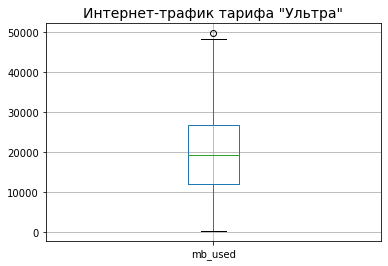

In [79]:
total_trf.query('mb_used!=0 and tariff=="ultra"').boxplot(column = 'mb_used');
plt.title('Интернет-трафик тарифа "Ультра"', fontsize = 14);

In [80]:
smart_variance_gb_smart = np.var(total_trf.query('mb_used!=0 and tariff=="ultra"')['mb_used'], ddof=1)
smart_variance_gb_smart

98746498.9327742

In [81]:
standard_deviation_gb_smart = np.std(total_trf.query('mb_used!=0 and tariff=="ultra"')['mb_used'], ddof=1)
standard_deviation_gb_smart

9937.127297804644

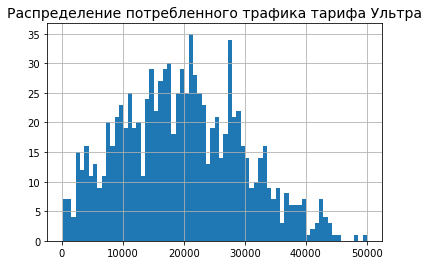

In [82]:
total_trf.query('mb_used!=0 and tariff=="ultra"')['mb_used'].hist(bins = 70, range = (100,50000))
plt.title('Распределение потребленного трафика тарифа Ультра', fontsize = 14);

Медианное и среднее значение потребления трафика на тарифе "Ультра" - 19,4 и 19,7 ГБ соответственно, разброс небольшой, что свидетельствует о небольшом количестве аномалий. Второй квартиль - от 12 до 19,4 ГБ. Стандартное отклонение составляет почти 10 ГБ. Верхний ус боксплота оканчивается примерно на 48 ГБ, но на гистограмме видно, что абоненты, потребляющие от 40 гб. трафика могут составлять отдельный сегмент (область от 40 до 45 ГБ похожа на небольшое автономное нормальное распределение). Предлагается использовать для проверки гипотез трафик абонентов, потребляющих от 0,3 до 40 ГБ. Также на гистограмме наблюдаются 2 больших аномалии в районе 22 и 28 ГБ.

### Вывод

Средняя длительность исходящих от абонента тарифа "Смарт" вызовов - 423 минуты (если говорить о диапазоне - от 285 до 423 минут, но длительность до 600 минут также не является аномалией), отправляет 34-38 смс в месяц и использует в среднем 16,4 ГБ трафика в месяц. Исходящие вызовы абонента тарифа "Ультра" в среднем дольше более чем на 100 минут, 547 минут. Аналогично и сообщений средний пользователь премиального тарифа отправляет на 17 больше - 51 СМС. Показатели интерент - трафика - 16,4 и 19,4 ГБ отличаются не так значительно, как голосовой трафик и сообщения.

## Формирование и проверка гипотез

In [83]:
total_trf = total_trf.query('revenue!=0')
total_trf.head(3)

,index,user_id,month,calls_qty,calls_minutes,message_date,mb_used,age,churn_date,city,...,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,revenue
0,0.0,1000,5,22.0,159.0,0.0,0.0,52,NaT,Краснодар,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
1,1.0,1000,6,43.0,172.0,0.0,0.0,52,NaT,Краснодар,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
2,2.0,1000,7,47.0,340.0,0.0,0.0,52,NaT,Краснодар,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0


Подготовим датасет для проверки первой гипотезы, утверждающей, что средняя выручка тарифов "Ультра" и "Смарт" различается. Для этого отфильтруем все ненулевые значения поля revenue.

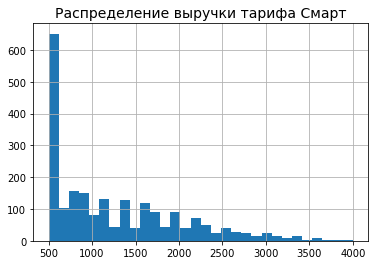

In [84]:
mean_revenue_smart = total_trf.query('tariff=="smart"').pivot_table(index = ['user_id', 'month'], values = 'revenue', aggfunc = 'sum').reset_index()
mean_revenue_smart['revenue'].hist(bins = 30, range = (500,4000))
plt.title('Распределение выручки тарифа Смарт', fontsize = 14);

In [85]:
mean_revenue_smart['revenue'].describe()

count    2226.000000
mean     1294.407457
std       821.542374
min       400.000000
25%       550.000000
50%      1035.000000
75%      1750.000000
max      6770.000000
Name: revenue, dtype: float64

Распределение отдаленно напоминает распределение Пуассона (или нормальное распределение, скошенное влево) до 4000, после идут аномалии. Пик на 500 рублях говорит о том, что большая часть абонентов укладывается в трафик, входящий в абонентскую плату.

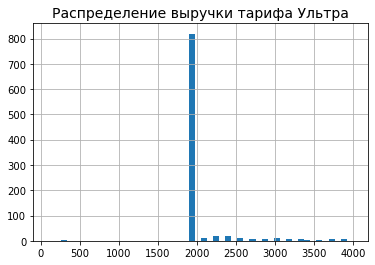

In [86]:
mean_revenue_ultra = total_trf.query('tariff=="ultra"').pivot_table(index = ['user_id', 'month'], values = 'revenue', aggfunc = 'sum').reset_index()
mean_revenue_ultra['revenue'].hist(bins = 50, range = (100,4000))
plt.title('Распределение выручки тарифа Ультра', fontsize = 14);

In [87]:
mean_revenue_ultra['revenue'].describe()

count     953.000000
mean     2062.854145
std       401.467943
min       150.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: revenue, dtype: float64

Аналогично, большая часть абонентов уклабывается в абонентскую плату 1950 руб/мес. Датасет начинается от 51 и заканчивается на 2405 руб. Для датасета возьмем диапазон от 1000 до 2000 руб.

In [88]:
ds_smart_rvn = mean_revenue_smart.query('revenue>499 and revenue<4000')
ds_ultra_rvn = mean_revenue_ultra.query('revenue>1900 and revenue<4000')

In [89]:
mean_revenue_smart.min(),ds_ultra_rvn.mean()

(user_id    1001.0
 month         1.0
 revenue     400.0
 dtype: float64,
 user_id    1264.966066
 month         8.239661
 revenue    2062.460233
 dtype: float64)

Сформируем датасеты для проверки гипотезы "средняя выручка пользователей тарифов "Ультра" и "Смарт" различается". Так как нулевая гипотеза всегда формируется так, чтобы использовать знак равенства, она будет звучать так: "средняя выручка пользователей тарифов "Ультра" и "Смарт" одинакова". Альтернативная гипотеза - "средняя выручка пользователей тарифов "Ультра" и "Смарт" различается".

In [90]:
smart_variance_revenue = np.var(ds_smart_rvn['revenue'], ddof=1)
ultra_variance_revenue = np.var(ds_ultra_rvn['revenue'], ddof=1)

In [91]:
smart_variance_revenue

568775.2766797895

In [92]:
ultra_variance_revenue

123175.25717489287

Сравним дисперсии выборок выручки двух тарифов для того, чтобы решить какое значение присваивать параметру equal_var. Если дисперсии выборок равны, необходимо присваивать True, если различаются, то False. В нашем случае параметр будет False, дисперсии не равны.

In [93]:
from scipy import stats as st
import numpy as np
alpha = 0.1
results = st.ttest_ind(ds_smart_rvn['revenue'], ds_ultra_rvn['revenue'],equal_var = False)

In [94]:
results.pvalue

3.447762271686721e-288

In [95]:
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


Импортируем библиотеки stats и numpy. Зададим параметр alpha равным 10%, датасеты далеки от идеальной формы нормального распределения, на обоих графиках основная масса значений расположена в районе месячной абонентской платы, поэтому сделаем допуск побольше. Применим метод ttest_ind о равенстве средних из двух генеральных совокупностей. pvalue получился равным нулю. Средние выручки двух тарифов не равны.

Проверим вторую гипотезу, которая звучит так: "средняя выручка пользователей из Москвы отличается от средней выручки пользователей по регионам". Аналогично, сформулируем нулевую гипотезу о равенстве средней выручки абонетов Москвы и регионов. Альтернативная гипотеза: средние значения выручки столичных и региональных абонентов различаются.

In [96]:
total_trf['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Курган', 'Барнаул', 'Красноярск', 'Архангельск', 'Липецк',
       'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Волжский', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

Проверим наличие дубликатов в поле city. Метод unique показывает, что их нет.

In [97]:
moscow_revenue = total_trf.query('city=="Москва"')

In [98]:
country_revenue = total_trf.query('city!="Москва"')

Сформируем датасеты для проверки гипотез и посмотрим на описания и распределения.

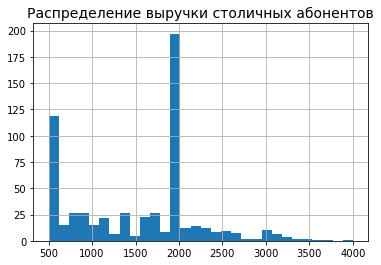

In [99]:
msk = moscow_revenue.pivot_table(index =  ['user_id','month'], values = 'revenue', aggfunc = 'sum').reset_index()
msk['revenue'].hist(bins = 30, range = (500,4000))
plt.title('Распределение выручки столичных абонентов', fontsize = 14);

Распределение абсолютно непохоже на нормальное, т.к. в области суммы абонентской платы тарифа "Смарт" и тарифа "Ультра" находятся пиковые значения. Но на теории мы не проходили такие ситуации, речь шла только о нормальных распределениях. Поэтому построим распределение выручки абонентов для нестоличного пространства и попробуем сделать ttest для этих ужасных графиков. Или у меня где-то ошибка и вследствие этого распределение, которое должно быть нормальным, превратилось в ненормальное.

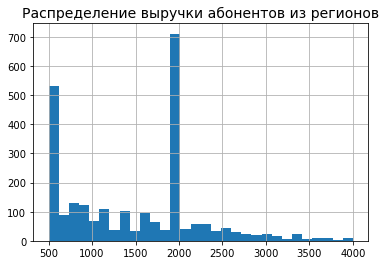

In [100]:
cntr = country_revenue.pivot_table(index =  ['user_id','month'], values = 'revenue', aggfunc = 'sum').reset_index()
cntr['revenue'].hist(bins = 30, range = (500,4000))
plt.title('Распределение выручки абонентов из регионов', fontsize = 14);

Гистограмма показывает очень похожее распределение, области суммы абонентской платы тарифа "Смарт" и тарифа "Ультра" находятся пиковые значения.

In [101]:
moscow_variance_revenue = np.var(msk['revenue'], ddof=1)

In [102]:
country_variance_revenue = np.var(cntr['revenue'], ddof=1)

In [103]:
moscow_variance_revenue

566850.6241783088

In [104]:
country_variance_revenue

663363.9394569591

Значения дисперсий выборок московских и региональных абонентов близки, но не равны. Параметр equal_var принимаем равным False.

In [105]:
alpha_country = 0.05
results = st.ttest_ind(msk['revenue'], cntr['revenue'],equal_var = False)

In [106]:
results.pvalue

0.3623416873727855

In [107]:
if results.pvalue < alpha_country:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


Вывод: средняя выручка абонентов Москвы и регионов сопоставимы.

In [108]:
median_rev = total_trf.pivot_table(index = 'tariff', values = 'revenue', aggfunc = ['mean','median','sum','count']).reset_index()
median_rev

,tariff,mean,median,sum,count
,,revenue,revenue,revenue,revenue
0,smart,703.798486,550.0,2881351.0,4094
1,ultra,1818.593895,1950.0,1965900.0,1081


## Общий вывод

Исходя из результатов анализа тариф "Смарт"  более массовый (абонентов в выборке в 4 раза больше) и приносит большую выручку в целом. Но показатель "выручка на 1 абонента" на тарифе "Ультра" выше почти в 3 раза. Медианные значения выручки на обоих тарифах находятся в зоне значений абонентской платы, это говорит о том, что большинству абонентов хватает услуг, вхдящих в стандартный пакет. Исходящие вызовы абонента тарифа "Ультра" в среднем дольше более чем на 100 минут, 547 минут. Аналогично и сообщений средний пользователь премиального тарифа отправляет на 17 больше - 51 СМС. Показатели интерент - трафика - 16,4 и 19,4 ГБ отличаются не так значительно, как голосовой трафик и сообщения. Гипотеза о том, что средняя выручка на обоих тарифах различна, подтверждается. Гипотеза о сопоставимости средней выручки абонента Москвы и регионального абонента также подтверждается.